In [92]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Estimation with MLE

In [101]:
# beta should be higher than c
n = 1000 # number of nodes - 585 similar to c elegans
d = 6  # number of neighbouts to take into account

#sigma = np.log(1/1e-3 - 1)    # intercept the higher the harder for creating edges 6
sigma = 8

n_iteration = 100000
warm_up     = 1400 # 10k

################################################
params_dict = {
    "n": n,
    "d": d,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [102]:
graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

In [103]:
#initial_guess = [0.5,0.5,-10]
#g = graphs[-1]
#est = estimator.MLEGraphModelEstimator(g, p=0)
#a_hat, b_hat, s_hat = est.estimate_parameters_torch(initial_guess=initial_guess, learning_rate=0.001, max_iter=30)

In [104]:
#print(a_hat,b_hat,s_hat)
#print(alpha, beta, sigma)

# Estimation with regression 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


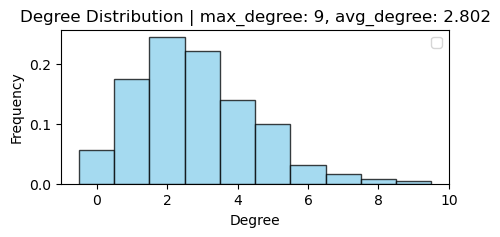

In [105]:
g = graphs[-1]
s = spec
G = nx.Graph(g)

ut = utils.GraphUtils()     
#fig = ut.plot_graph_and_spectrum(g, s, title='Graph and Spectrum', size=(10,5))

fig = ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))
#fig = ut.plot_graph_from_adjacency(adj_matrix=g, pos=None, title='Graph', size=(7, 5))


#ut.save_graph_html(g, params_dict)

In [106]:
est = estimator.LogitRegEstimator(g , d=0)

In [107]:
features, labels = est.get_features_labels()

In [108]:
result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

print('real: ', -sigma)
print('est: ', params[0])

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.047      
Date:               2024-07-01 11:31 AIC:              18356.4326 
No. Observations:   499500           BIC:              18389.7967 
Df Model:           2                Log-Likelihood:   -9175.2    
Df Residuals:       499497           LL-Null:          -9631.9    
Converged:          1.0000           LLR p-value:      4.6231e-199
No. Iterations:     33.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.8597     0.0777   -101.1272   0.0000   -8.0120   -7.7074
x1        0.2904     0.0135     21.5394   0.0000    0.2640    0.3169
x2        0.3146     0.0135     23.3721   0.0000    0.2883    0.3410

real:  -

In [109]:
summary = result.summary2()
summary.tables[1].loc['const']


Coef.        -7.859698
Std.Err.      0.077721
z          -101.127196
P>|z|         0.000000
[0.025       -8.012028
0.975]       -7.707367
Name: const, dtype: float64

# Multiple times

In [89]:
n_runs = 10
pathfolder = f'runs/est_sigma_{sigma}'

# Create the directory if it does not exist
if not os.path.exists(pathfolder):
    os.makedirs(pathfolder)

In [90]:
params_list = []
result_list = []
for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
    graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect

    est = estimator.LogitRegEstimator(g, d=0)

    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)

    import pickle
    with open(f'{pathfolder}/results_array_{i}.pkl', 'wb') as f:
        pickle.dump(result_list, f)



iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it